In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import xgboost as xgb

import shap 
shap.initjs()

In [2]:
df = pd.read_csv('abalone/abalone.data',
        names=[
            'sex','length','diameter','height',
            'whole weight','shucked weight',
            'viscera weight','shell weight','rings'
        ]
    )

print(len(df))
df.head()

4177


,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


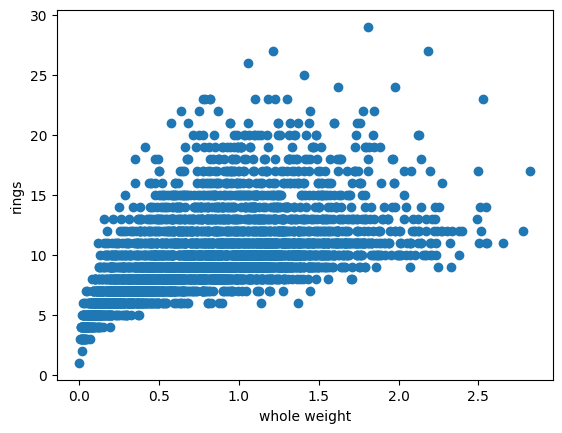

In [3]:
#Plot: whole weight 

fig,ax = plt.subplots()

ax.scatter(df['whole weight'],df['rings'])
ax.set_ylabel('rings')
ax.set_xlabel('whole weight')

plt.show()

<Axes: >

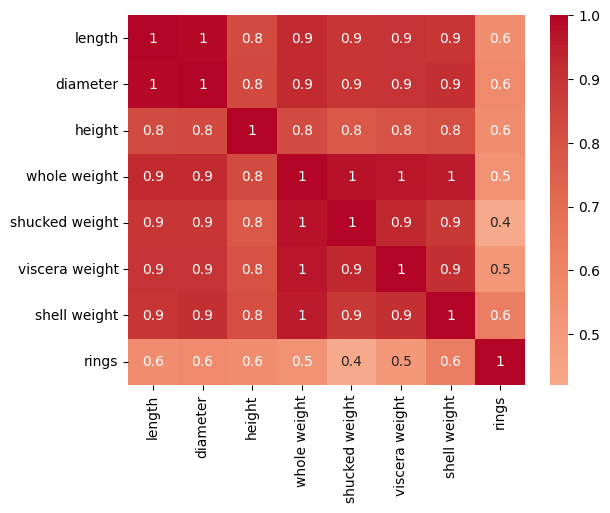

In [4]:
#Plot: correlation heatmap

vals = [
    'length','diameter','height',
    'whole weight','shucked weight',
    'viscera weight','shell weight','rings'
    ]

corr_mat = pd.DataFrame(df[vals],columns=vals).corr()

sns.heatmap(
    corr_mat,
    cmap = 'coolwarm',
    center = 0,
    annot = True,
    fmt = '.1g'
)

### Feature

In [5]:
Y = df['rings']
X = df[['sex','length','diameter','height',
        'shucked weight','viscera weight','shell weight']]

In [6]:
X = X.copy()

X['sex.M'] = (X['sex'] == 'M').astype(int)
X['sex.F'] = (X['sex'] == 'F').astype(int)
X['sex.I'] = (X['sex'] == 'I').astype(int)

X = X.drop('sex', axis=1)

In [7]:
X.head()

,length,diameter,height,shucked weight,viscera weight,shell weight,sex.M,sex.F,sex.I
0,0.455,0.365,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.265,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.420,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.365,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.255,0.080,0.0895,0.0395,0.055,0,0,1


### Modeling

In [8]:
# Training 
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
# Predictions 
y_pred = model.predict(X)

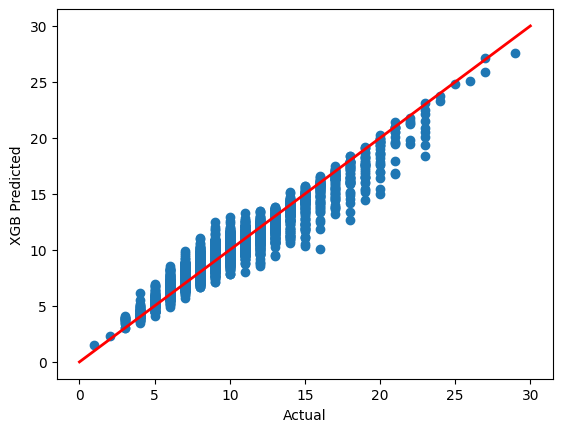

In [10]:
# Evaluation

fig,ax = plt.subplots()

ax.scatter(Y,y_pred)
ax.plot([0,30],[0,30],color='red',linestyle='-',linewidth=2)

ax.set_ylabel('XGB Predicted')
ax.set_xlabel('Actual')

plt.show()

#### Standard SHAP values

In [11]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# shap_values = explainer(X[0:100])

In [13]:
np.shape(shap_values.values)

(4177, 9)

#### Waterfall plot

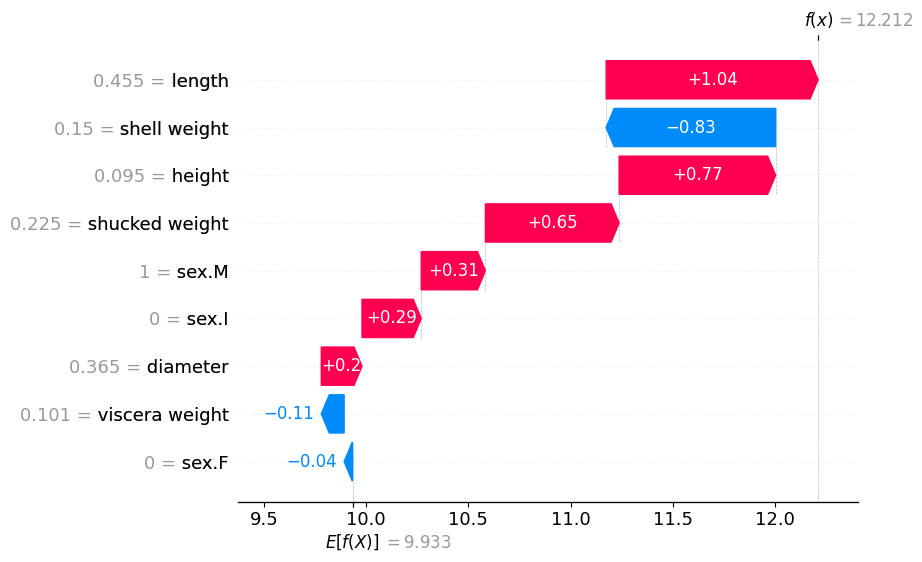

In [15]:
# First observation
shap.plots.waterfall(shap_values[0])

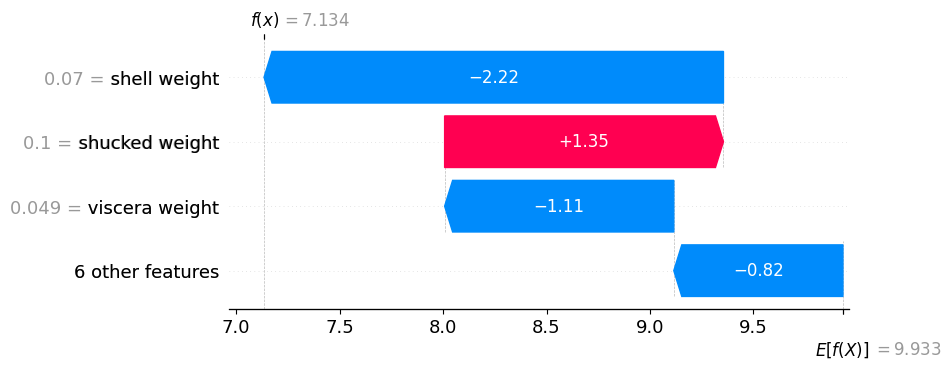

In [17]:
# Second observation
shap.plots.waterfall(shap_values[1], max_display=4)

#### Force plot

In [20]:
# Condensed waterfall plot
shap.plots.force(shap_values[0])

In [21]:
# staced force plot
shap.plots.force(shap_values[0:100])

#### Absolute Mean SHAP

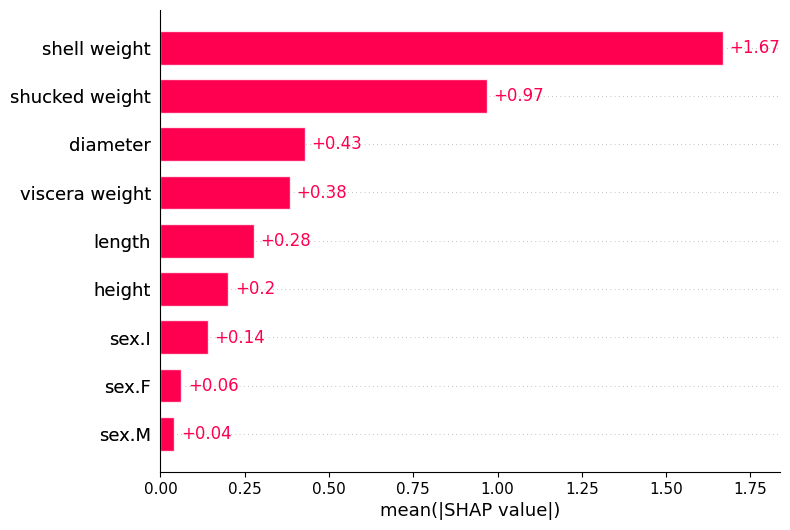

In [23]:
# Each of the bars gives the absolute mean SHAP values for the feature. 

shap.plots.bar(shap_values)

#### Beeswarm plot

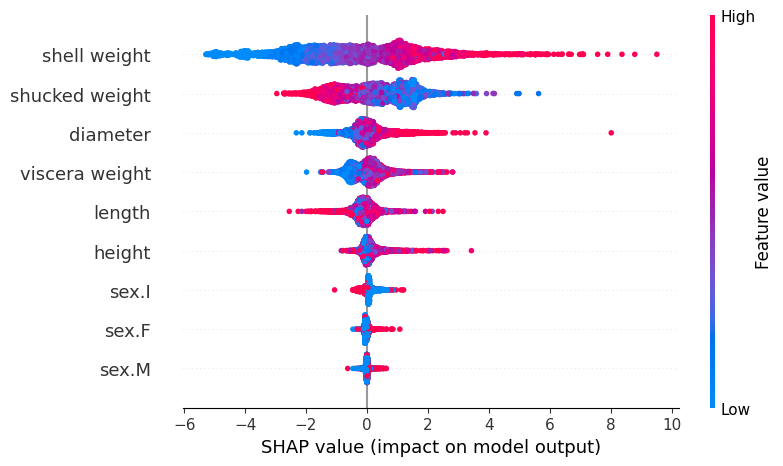

In [24]:
shap.plots.beeswarm(shap_values)

#### Dependence plots

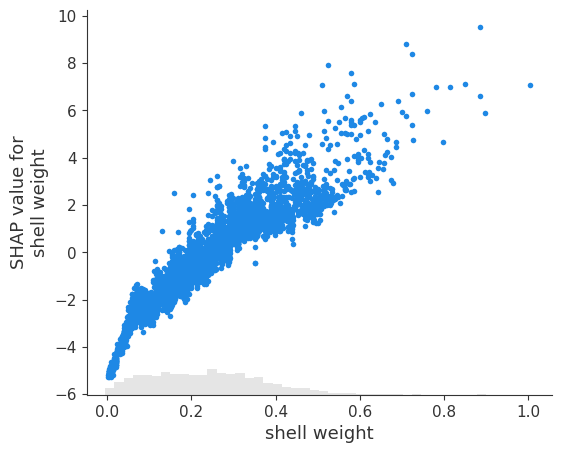

In [25]:
shap.plots.scatter(shap_values[:,'shell weight'])

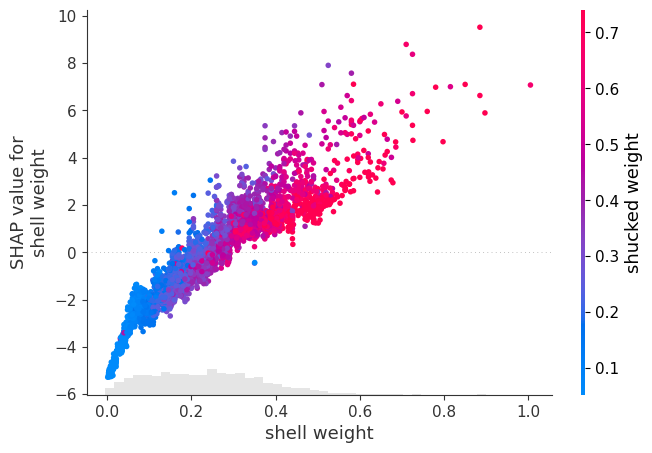

In [26]:
shap.plots.scatter(shap_values[:,'shell weight'],color=shap_values[:,'shucked weight'])

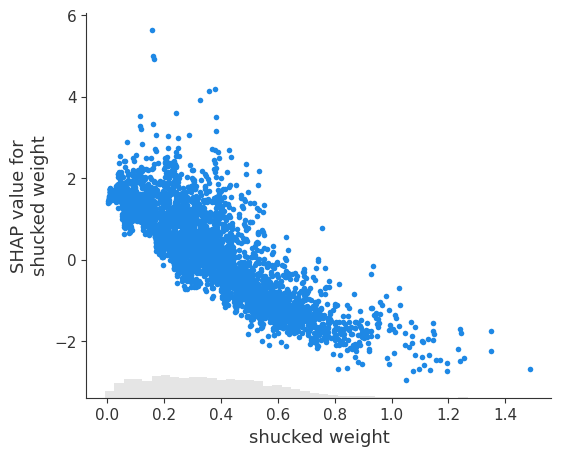

In [27]:
shap.plots.scatter(shap_values[:,'shucked weight'])